# Introduction

Baseline experiment

# Set up Environment

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import SelectFromModel
from math import sqrt
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                             explained_variance_score, max_error)

# display all columns of dataframes in the notebook
pd.options.display.max_columns = None

# ignore warnings
warnings.filterwarnings('ignore')

# set up random seed for reproducibility
RANDOM_SEED = 42

# Load Data

In [2]:
file_path = '../data/raw/training_data/'
file_name = 'training_data_ATL.zip'
df = pd.read_csv(file_path + file_name)

# Pre-process

## Remove Irrelevant Columns

In [3]:
# remove the Unnamed column
df.drop(df.columns[df.columns.str.contains(
    'unnamed', case=False)], axis=1, inplace=True)

In [4]:
df.head(3)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrivalDate,ARR_Flight_SLDT,Num_Arr_SLDT-30,Num_Arr_SLDT-25,Num_Arr_SLDT-20,Num_Arr_SLDT-15,Num_Arr_SLDT-10,Num_Arr_SLDT-5,Num_Arr_SLDT-0,Num_Arr_SLDT+5,Num_Arr_SLDT+10,Num_Arr_SLDT+15,Num_Arr_SLDT+20,Num_Arr_SLDT+25,Num_Dep_SLDT-30,Num_Dep_SLDT-25,Num_Dep_SLDT-20,Num_Dep_SLDT-15,Num_Dep_SLDT-10,Num_Dep_SLDT-5,Num_Dep_SLDT-0,Num_Dep_SLDT+5,Num_Dep_SLDT+10,Num_Dep_SLDT+15,Num_Dep_SLDT+20,Num_Dep_SLDT+25
0,2017,1,1,1,7,2017-01-01 00:00:00,AA,19805,AA,N869AA,232,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14:25:00,1430.0,5.0,5.0,0.0,0.0,1400-1459,12.0,1442.0,1717.0,10.0,17:26:00,1727.0,1.0,1.0,0.0,0.0,1700-1759,121.0,117.0,95.0,1.0,731.0,3,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00,2017-01-01 17:26:00,9,9,12,3,7,0,2,3,2,5,1,3,3,2,0,3,7,0,3,2,1,9,3,5
1,2017,1,1,2,1,2017-01-02 00:00:00,AA,19805,AA,N866AA,232,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14:25:00,1420.0,-5.0,0.0,0.0,-1.0,1400-1459,13.0,1433.0,1723.0,11.0,17:26:00,1734.0,8.0,8.0,0.0,0.0,1700-1759,121.0,134.0,110.0,1.0,731.0,3,NaN,NaN,NaN,NaN,NaN,2017-01-02 00:00:00,2017-01-02 17:26:00,6,8,9,4,10,0,2,1,5,4,2,2,6,3,1,4,8,0,3,2,4,11,6,3
2,2017,1,1,3,2,2017-01-03 00:00:00,AA,19805,AA,N897AA,232,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14:25:00,1426.0,1.0,1.0,0.0,0.0,1400-1459,14.0,1440.0,1718.0,5.0,17:26:00,1723.0,-3.0,0.0,0.0,-1.0,1700-1759,121.0,117.0,98.0,1.0,731.0,3,NaN,NaN,NaN,NaN,NaN,2017-01-03 00:00:00,2017-01-03 17:26:00,6,10,9,3,8,0,2,1,4,4,4,2,5,2,0,4,5,0,3,2,4,14,7,4


In [5]:
df.shape

(744979, 84)

In [12]:
traffic = df[df.columns[-24:]]
traffic.columns = traffic.columns.str.replace('SLDT', 'SIBT')
traffic.head()

,Num_Arr_SIBT-30,Num_Arr_SIBT-25,Num_Arr_SIBT-20,Num_Arr_SIBT-15,Num_Arr_SIBT-10,Num_Arr_SIBT-5,Num_Arr_SIBT-0,Num_Arr_SIBT+5,Num_Arr_SIBT+10,Num_Arr_SIBT+15,Num_Arr_SIBT+20,Num_Arr_SIBT+25,Num_Dep_SIBT-30,Num_Dep_SIBT-25,Num_Dep_SIBT-20,Num_Dep_SIBT-15,Num_Dep_SIBT-10,Num_Dep_SIBT-5,Num_Dep_SIBT-0,Num_Dep_SIBT+5,Num_Dep_SIBT+10,Num_Dep_SIBT+15,Num_Dep_SIBT+20,Num_Dep_SIBT+25
0,9,9,12,3,7,0,2,3,2,5,1,3,3,2,0,3,7,0,3,2,1,9,3,5
1,6,8,9,4,10,0,2,1,5,4,2,2,6,3,1,4,8,0,3,2,4,11,6,3
2,6,10,9,3,8,0,2,1,4,4,4,2,5,2,0,4,5,0,3,2,4,14,7,4
3,7,10,11,4,9,0,3,1,5,5,3,1,5,2,0,5,5,0,3,2,4,14,7,4
4,5,8,10,4,7,0,2,1,4,5,3,2,5,2,0,5,6,0,3,3,3,14,5,4


In [18]:
# obtain a segment of arrivals (intersted columns)
segment = df[['ActualElapsedTime', 'FlightDate', 'ArrivalDate', 'Reporting_Airline', 'CRSDepTime',
                    'DepTime', 'DepDelay', 'DepDel15', 'DepartureDelayGroups', 'CRSArrTime',
                    'CRSElapsedTime', 'Distance', 'DistanceGroup']]

In [19]:
# rename some column names
segment = segment.rename(columns={'ActualElapsedTime': 'AOBTtoAIBT',
                                  'FlightDate': 'SOBTDate',
                                  'ArrivalDate': 'SIBTDate',
                                  'Reporting_Airline': 'UniqueCarrierCode',
                                  'CRSDepTime': 'SOBTTime',
                                  'DepTime': 'AOBTTime',
                                  'DepDelay': 'OBTDelay',
                                  'DepDel15': 'OBTDel15',
                                  'DepartureDelayGroups': 'OBTDelayGroups',
                                  'CRSArrTime': 'SIBTTime',
                                  'CRSElapsedTime': 'SOBTtoSIBT',
                                  })

In [20]:
segment = pd.concat([segment, traffic], axis=1)
segment.head()

,AOBTtoAIBT,SOBTDate,SIBTDate,UniqueCarrierCode,SOBTTime,AOBTTime,OBTDelay,OBTDel15,OBTDelayGroups,SIBTTime,SOBTtoSIBT,Distance,DistanceGroup,Num_Arr_SIBT-30,Num_Arr_SIBT-25,Num_Arr_SIBT-20,Num_Arr_SIBT-15,Num_Arr_SIBT-10,Num_Arr_SIBT-5,Num_Arr_SIBT-0,Num_Arr_SIBT+5,Num_Arr_SIBT+10,Num_Arr_SIBT+15,Num_Arr_SIBT+20,Num_Arr_SIBT+25,Num_Dep_SIBT-30,Num_Dep_SIBT-25,Num_Dep_SIBT-20,Num_Dep_SIBT-15,Num_Dep_SIBT-10,Num_Dep_SIBT-5,Num_Dep_SIBT-0,Num_Dep_SIBT+5,Num_Dep_SIBT+10,Num_Dep_SIBT+15,Num_Dep_SIBT+20,Num_Dep_SIBT+25
0,117.0,2017-01-01 00:00:00,2017-01-01 00:00:00,AA,14:25:00,1430.0,5.0,0.0,0.0,17:26:00,121.0,731.0,3,9,9,12,3,7,0,2,3,2,5,1,3,3,2,0,3,7,0,3,2,1,9,3,5
1,134.0,2017-01-02 00:00:00,2017-01-02 00:00:00,AA,14:25:00,1420.0,-5.0,0.0,-1.0,17:26:00,121.0,731.0,3,6,8,9,4,10,0,2,1,5,4,2,2,6,3,1,4,8,0,3,2,4,11,6,3
2,117.0,2017-01-03 00:00:00,2017-01-03 00:00:00,AA,14:25:00,1426.0,1.0,0.0,0.0,17:26:00,121.0,731.0,3,6,10,9,3,8,0,2,1,4,4,4,2,5,2,0,4,5,0,3,2,4,14,7,4
3,103.0,2017-01-04 00:00:00,2017-01-04 00:00:00,AA,14:25:00,1421.0,-4.0,0.0,-1.0,17:26:00,121.0,731.0,3,7,10,11,4,9,0,3,1,5,5,3,1,5,2,0,5,5,0,3,2,4,14,7,4
4,105.0,2017-01-05 00:00:00,2017-01-05 00:00:00,AA,14:25:00,1424.0,-1.0,0.0,-1.0,17:26:00,121.0,731.0,3,5,8,10,4,7,0,2,1,4,5,3,2,5,2,0,5,6,0,3,3,3,14,5,4


## Format Datetime Objects

In [23]:
segment['SOBTDate'] = pd.to_datetime(segment['SOBTDate']).dt.date
segment['SIBTDate'] = pd.to_datetime(segment['SIBTDate']).dt.date
segment['SOBTTime'] = pd.to_datetime(
    segment['SOBTTime'], format='%H:%M:%S').dt.time
segment['SIBTTime'] = pd.to_datetime(
    segment['SIBTTime'], format='%H:%M:%S').dt.time

In [24]:
# format AOBTTime
segment['AOBTTime'] = segment['AOBTTime'].apply(lambda x: str(int(x)).zfill(4))

# for actual timings, '2400' would be produced when the date changed to the next day
# for e.g., 2400 1 Jan is actually equivalent to 0000 2 Jan

In [25]:
print('Number of AOBTTime being "2400":',
      segment[segment['AOBTTime'] == '2400'].shape[0])

Number of AOBTTime being "2400": 60


In [26]:
one_day = pd.Timedelta('1 days')

# Initialize AOBTDate
segment['AOBTDate'] = segment['SOBTDate']

# if 2400 occurs, add 1 day to AOBTDate
segment.loc[segment.AOBTTime == '2400',
            "AOBTDate"] = segment['AOBTDate'] + one_day

# update AOBTTime from '2400' to '0000'
segment.loc[segment.AOBTTime == '2400', "AOBTTime"] = '0000'

In [27]:
# now the issue of '2400' is resolved
# update AOBTTime to time object
segment['AOBTTime'] = pd.to_datetime(
    segment['AOBTTime'], format='%H%M').dt.time

In [28]:
# merge date & time, and only keep datetime objects
list_1 = ['SOBTDate', 'SIBTDate', 'AOBTDate']
list_2 = ['SOBTTime', 'SIBTTime', 'AOBTTime']
list_3 = ['SOBT', 'SIBT', 'AOBT']

for i in range(3):
    segment[list_1[i]] = segment[list_1[i]].apply(lambda x: str(x))
    segment[list_2[i]] = segment[list_2[i]].apply(lambda x: str(x))
    segment[list_3[i]] = pd.to_datetime(
        segment[list_1[i]] + ' ' + segment[list_2[i]])
    segment = segment.drop(labels=[list_1[i], list_2[i]], axis=1)

In [29]:
segment.head(3)

,AOBTtoAIBT,UniqueCarrierCode,OBTDelay,OBTDel15,OBTDelayGroups,SOBTtoSIBT,Distance,DistanceGroup,Num_Arr_SIBT-30,Num_Arr_SIBT-25,Num_Arr_SIBT-20,Num_Arr_SIBT-15,Num_Arr_SIBT-10,Num_Arr_SIBT-5,Num_Arr_SIBT-0,Num_Arr_SIBT+5,Num_Arr_SIBT+10,Num_Arr_SIBT+15,Num_Arr_SIBT+20,Num_Arr_SIBT+25,Num_Dep_SIBT-30,Num_Dep_SIBT-25,Num_Dep_SIBT-20,Num_Dep_SIBT-15,Num_Dep_SIBT-10,Num_Dep_SIBT-5,Num_Dep_SIBT-0,Num_Dep_SIBT+5,Num_Dep_SIBT+10,Num_Dep_SIBT+15,Num_Dep_SIBT+20,Num_Dep_SIBT+25,SOBT,SIBT,AOBT
0,117.0,AA,5.0,0.0,0.0,121.0,731.0,3,9,9,12,3,7,0,2,3,2,5,1,3,3,2,0,3,7,0,3,2,1,9,3,5,2017-01-01 14:25:00,2017-01-01 17:26:00,2017-01-01 14:30:00
1,134.0,AA,-5.0,0.0,-1.0,121.0,731.0,3,6,8,9,4,10,0,2,1,5,4,2,2,6,3,1,4,8,0,3,2,4,11,6,3,2017-01-02 14:25:00,2017-01-02 17:26:00,2017-01-02 14:20:00
2,117.0,AA,1.0,0.0,0.0,121.0,731.0,3,6,10,9,3,8,0,2,1,4,4,4,2,5,2,0,4,5,0,3,2,4,14,7,4,2017-01-03 14:25:00,2017-01-03 17:26:00,2017-01-03 14:26:00


## Create Time-related Features

In [30]:
# create Quarter, Month, DayOfMonth, DayOfWeek based on SIBT (previously, SOBT)
segment['SIBTQuarter'] = segment['SIBT'].dt.quarter
segment['SIBTMonth'] = segment['SIBT'].dt.month
segment['SIBTDayOfMonth'] = segment['SIBT'].dt.day
segment['SIBTDayOfWeek'] = segment['SIBT'].dt.weekday + 1
segment['SIBTHour'] = segment['SIBT'].dt.hour

In [31]:
# there are 14 flights (from EDA) scheduled to arrive at ATL in 2019
# remove them as only arrival flights scheduled in 2017 and 2018 are of concern
segment = segment[segment['SIBT'].dt.year != 2019].reset_index(drop=True)

## Impute Missing Values

In [32]:
# find columns that contain null values
null_col = segment.columns[segment.isna().any()].tolist()

# find how many values are missing in each column
missing_count = pd.Series(segment[null_col].isna().sum(), name='Count')

# determine percentage of missing values
missing_percentage = pd.Series(
    np.round(segment[null_col].isnull().mean()*100, 3), name='Percentage')

missing_var_summary = pd.concat([missing_count, missing_percentage], axis=1)
missing_var_summary

,Count,Percentage
OBTDelay,460,0.062
OBTDel15,460,0.062
OBTDelayGroups,460,0.062


In [33]:
# handle missing OBTDelay
segment.loc[segment.OBTDelay.isnull(), "OBTDelay"] = (
    segment.AOBT - segment.SOBT).astype('timedelta64[m]')


def delayed_more_than_15(x):
    # handle missing OBTDel15
    if x >= 15:
        a = 1
    else:
        a = 0
    return a


segment['OBTDel15'] = segment['OBTDelay'].apply(
    lambda x: delayed_more_than_15(x))

# for all 460 entries, the OBTDelay is 0. Proved by:
# segment[segment['OBTDelayGroups'].isnull()]['OBTDelay'].unique()
# Hence, update missing OBTDelayGroups to be 0
segment.loc[segment.OBTDelayGroups.isnull(), "OBTDelayGroups"] = 0

In [34]:
segment.head(3)

,AOBTtoAIBT,UniqueCarrierCode,OBTDelay,OBTDel15,OBTDelayGroups,SOBTtoSIBT,Distance,DistanceGroup,Num_Arr_SIBT-30,Num_Arr_SIBT-25,Num_Arr_SIBT-20,Num_Arr_SIBT-15,Num_Arr_SIBT-10,Num_Arr_SIBT-5,Num_Arr_SIBT-0,Num_Arr_SIBT+5,Num_Arr_SIBT+10,Num_Arr_SIBT+15,Num_Arr_SIBT+20,Num_Arr_SIBT+25,Num_Dep_SIBT-30,Num_Dep_SIBT-25,Num_Dep_SIBT-20,Num_Dep_SIBT-15,Num_Dep_SIBT-10,Num_Dep_SIBT-5,Num_Dep_SIBT-0,Num_Dep_SIBT+5,Num_Dep_SIBT+10,Num_Dep_SIBT+15,Num_Dep_SIBT+20,Num_Dep_SIBT+25,SOBT,SIBT,AOBT,SIBTQuarter,SIBTMonth,SIBTDayOfMonth,SIBTDayOfWeek,SIBTHour
0,117.0,AA,5.0,0,0.0,121.0,731.0,3,9,9,12,3,7,0,2,3,2,5,1,3,3,2,0,3,7,0,3,2,1,9,3,5,2017-01-01 14:25:00,2017-01-01 17:26:00,2017-01-01 14:30:00,1,1,1,7,17
1,134.0,AA,-5.0,0,-1.0,121.0,731.0,3,6,8,9,4,10,0,2,1,5,4,2,2,6,3,1,4,8,0,3,2,4,11,6,3,2017-01-02 14:25:00,2017-01-02 17:26:00,2017-01-02 14:20:00,1,1,2,1,17
2,117.0,AA,1.0,0,0.0,121.0,731.0,3,6,10,9,3,8,0,2,1,4,4,4,2,5,2,0,4,5,0,3,2,4,14,7,4,2017-01-03 14:25:00,2017-01-03 17:26:00,2017-01-03 14:26:00,1,1,3,2,17


In [35]:
# format float to int
to_int = ['AOBTtoAIBT', 'OBTDelay', 'OBTDelayGroups',
          'SOBTtoSIBT', 'Distance', 'DistanceGroup']

for item in to_int:
    segment[item] = segment[item].astype(int)

In [36]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744965 entries, 0 to 744964
Data columns (total 40 columns):
AOBTtoAIBT           744965 non-null int32
UniqueCarrierCode    744965 non-null object
OBTDelay             744965 non-null int32
OBTDel15             744965 non-null int64
OBTDelayGroups       744965 non-null int32
SOBTtoSIBT           744965 non-null int32
Distance             744965 non-null int32
DistanceGroup        744965 non-null int32
Num_Arr_SIBT-30      744965 non-null int64
Num_Arr_SIBT-25      744965 non-null int64
Num_Arr_SIBT-20      744965 non-null int64
Num_Arr_SIBT-15      744965 non-null int64
Num_Arr_SIBT-10      744965 non-null int64
Num_Arr_SIBT-5       744965 non-null int64
Num_Arr_SIBT-0       744965 non-null int64
Num_Arr_SIBT+5       744965 non-null int64
Num_Arr_SIBT+10      744965 non-null int64
Num_Arr_SIBT+15      744965 non-null int64
Num_Arr_SIBT+20      744965 non-null int64
Num_Arr_SIBT+25      744965 non-null int64
Num_Dep_SIBT-30      744965 

# Feature Engineering

In [104]:
flights = segment.copy()

# sort flights by SIBT
flights.sort_values('SIBT', inplace=True, ascending=True)
flights = flights.reset_index(drop=True)

In [105]:
flights.head(3)

,AOBTtoAIBT,UniqueCarrierCode,OBTDelay,OBTDel15,OBTDelayGroups,SOBTtoSIBT,Distance,DistanceGroup,Num_Arr_SIBT-30,Num_Arr_SIBT-25,Num_Arr_SIBT-20,Num_Arr_SIBT-15,Num_Arr_SIBT-10,Num_Arr_SIBT-5,Num_Arr_SIBT-0,Num_Arr_SIBT+5,Num_Arr_SIBT+10,Num_Arr_SIBT+15,Num_Arr_SIBT+20,Num_Arr_SIBT+25,Num_Dep_SIBT-30,Num_Dep_SIBT-25,Num_Dep_SIBT-20,Num_Dep_SIBT-15,Num_Dep_SIBT-10,Num_Dep_SIBT-5,Num_Dep_SIBT-0,Num_Dep_SIBT+5,Num_Dep_SIBT+10,Num_Dep_SIBT+15,Num_Dep_SIBT+20,Num_Dep_SIBT+25,SOBT,SIBT,AOBT,SIBTQuarter,SIBTMonth,SIBTDayOfMonth,SIBTDayOfWeek,SIBTHour
0,218,DL,-2,0,-1,223,1590,7,0,0,0,0,1,0,0,2,0,0,0,0,2,1,1,0,1,0,0,3,1,0,3,1,2017-01-01 00:55:00,2017-01-01 06:38:00,2017-01-01 00:53:00,1,1,1,7,6
1,81,F9,-4,0,-1,88,404,2,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,3,0,3,1,0,3,1,0,2017-01-01 05:15:00,2017-01-01 06:43:00,2017-01-01 05:11:00,1,1,1,7,6
2,88,EV,302,1,12,57,106,1,0,0,0,0,3,0,0,0,0,0,1,0,1,0,1,0,4,0,2,0,3,1,0,0,2017-01-01 05:49:00,2017-01-01 06:46:00,2017-01-01 10:51:00,1,1,1,7,6


In [106]:
traffic_new = flights[flights.columns[8:32]]
traffic_new.head()

,Num_Arr_SIBT-30,Num_Arr_SIBT-25,Num_Arr_SIBT-20,Num_Arr_SIBT-15,Num_Arr_SIBT-10,Num_Arr_SIBT-5,Num_Arr_SIBT-0,Num_Arr_SIBT+5,Num_Arr_SIBT+10,Num_Arr_SIBT+15,Num_Arr_SIBT+20,Num_Arr_SIBT+25,Num_Dep_SIBT-30,Num_Dep_SIBT-25,Num_Dep_SIBT-20,Num_Dep_SIBT-15,Num_Dep_SIBT-10,Num_Dep_SIBT-5,Num_Dep_SIBT-0,Num_Dep_SIBT+5,Num_Dep_SIBT+10,Num_Dep_SIBT+15,Num_Dep_SIBT+20,Num_Dep_SIBT+25
0,0,0,0,0,1,0,0,2,0,0,0,0,2,1,1,0,1,0,0,3,1,0,3,1
1,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,3,0,3,1,0,3,1,0
2,0,0,0,0,3,0,0,0,0,0,1,0,1,0,1,0,4,0,2,0,3,1,0,0
3,1,2,0,0,1,0,0,1,3,7,8,2,0,3,1,0,4,0,0,0,0,1,0,1
4,1,0,0,0,3,0,1,7,5,7,1,6,2,0,3,1,0,0,0,0,1,1,1,1


In [107]:
flights = flights[['AOBTtoAIBT', 'UniqueCarrierCode', 'OBTDelay', 'OBTDel15', 'OBTDelayGroups', 'SOBTtoSIBT',
                   'Distance', 'DistanceGroup', 'SIBTQuarter', 'SIBTMonth', 'SIBTDayOfMonth', 'SIBTDayOfWeek',
                   'SIBTHour']]

In [108]:
flights = pd.concat([flights, traffic_new], axis=1)
flights.head()

,AOBTtoAIBT,UniqueCarrierCode,OBTDelay,OBTDel15,OBTDelayGroups,SOBTtoSIBT,Distance,DistanceGroup,SIBTQuarter,SIBTMonth,SIBTDayOfMonth,SIBTDayOfWeek,SIBTHour,Num_Arr_SIBT-30,Num_Arr_SIBT-25,Num_Arr_SIBT-20,Num_Arr_SIBT-15,Num_Arr_SIBT-10,Num_Arr_SIBT-5,Num_Arr_SIBT-0,Num_Arr_SIBT+5,Num_Arr_SIBT+10,Num_Arr_SIBT+15,Num_Arr_SIBT+20,Num_Arr_SIBT+25,Num_Dep_SIBT-30,Num_Dep_SIBT-25,Num_Dep_SIBT-20,Num_Dep_SIBT-15,Num_Dep_SIBT-10,Num_Dep_SIBT-5,Num_Dep_SIBT-0,Num_Dep_SIBT+5,Num_Dep_SIBT+10,Num_Dep_SIBT+15,Num_Dep_SIBT+20,Num_Dep_SIBT+25
0,218,DL,-2,0,-1,223,1590,7,1,1,1,7,6,0,0,0,0,1,0,0,2,0,0,0,0,2,1,1,0,1,0,0,3,1,0,3,1
1,81,F9,-4,0,-1,88,404,2,1,1,1,7,6,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,3,0,3,1,0,3,1,0
2,88,EV,302,1,12,57,106,1,1,1,1,7,6,0,0,0,0,3,0,0,0,0,0,1,0,1,0,1,0,4,0,2,0,3,1,0,0
3,111,DL,-2,0,-1,98,447,2,1,1,1,7,7,1,2,0,0,1,0,0,1,3,7,8,2,0,3,1,0,4,0,0,0,0,1,0,1
4,72,DL,-4,0,-1,76,226,1,1,1,1,7,7,1,0,0,0,3,0,1,7,5,7,1,6,2,0,3,1,0,0,0,0,1,1,1,1


In [72]:
flights.shape

(744965, 37)

## Separate Train and Validation Datasets

In [109]:
# the last 10000 flights are set as validation dataset
X_train, X_val, y_train, y_val = train_test_split(flights,
                                                  flights['AOBTtoAIBT'],
                                                  shuffle=False,
                                                  test_size=10000)

X_train.shape, X_val.shape

((734965, 37), (10000, 37))

In [110]:
X_val.head(3)

,AOBTtoAIBT,UniqueCarrierCode,OBTDelay,OBTDel15,OBTDelayGroups,SOBTtoSIBT,Distance,DistanceGroup,SIBTQuarter,SIBTMonth,SIBTDayOfMonth,SIBTDayOfWeek,SIBTHour,Num_Arr_SIBT-30,Num_Arr_SIBT-25,Num_Arr_SIBT-20,Num_Arr_SIBT-15,Num_Arr_SIBT-10,Num_Arr_SIBT-5,Num_Arr_SIBT-0,Num_Arr_SIBT+5,Num_Arr_SIBT+10,Num_Arr_SIBT+15,Num_Arr_SIBT+20,Num_Arr_SIBT+25,Num_Dep_SIBT-30,Num_Dep_SIBT-25,Num_Dep_SIBT-20,Num_Dep_SIBT-15,Num_Dep_SIBT-10,Num_Dep_SIBT-5,Num_Dep_SIBT-0,Num_Dep_SIBT+5,Num_Dep_SIBT+10,Num_Dep_SIBT+15,Num_Dep_SIBT+20,Num_Dep_SIBT+25
734965,106,DL,12,0,0,116,545,3,4,12,21,5,19,4,4,8,6,16,0,5,9,3,7,12,10,8,5,7,3,29,0,10,8,4,4,3,3
734966,110,DL,53,1,3,119,581,3,4,12,21,5,19,4,4,8,6,17,0,5,9,4,6,11,11,9,5,6,3,30,0,10,7,4,4,3,4
734967,99,9E,26,1,1,105,377,2,4,12,21,5,20,2,6,6,7,17,0,5,8,7,11,11,12,8,8,2,4,31,0,8,5,6,2,4,4


The validation set are flights after 2018-12-21 6pm.

## Temporal Variables

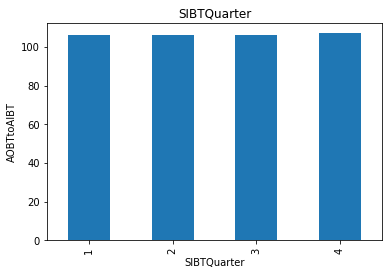

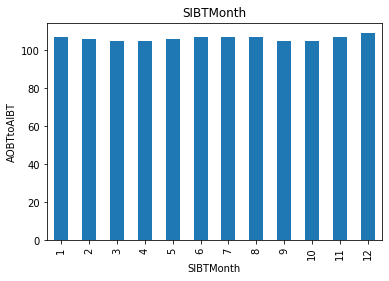

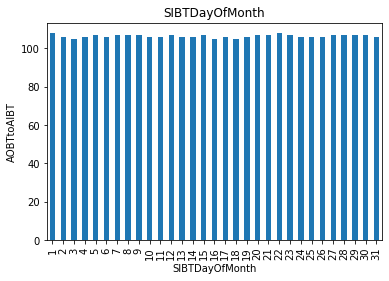

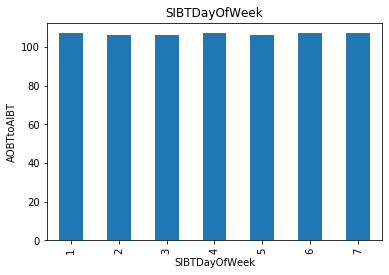

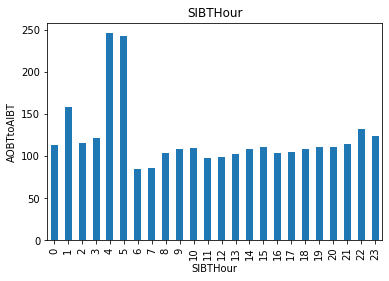

In [111]:
temporal_var = ['SIBTQuarter', 'SIBTMonth',
                'SIBTDayOfMonth', 'SIBTDayOfWeek', 'SIBTHour']


def analyse_temporal_var(df, var):

    # function plots median actual flight duration by every temporal var

    temp = df.copy()
    temp.groupby(var)['AOBTtoAIBT'].median().plot.bar()
    plt.title(var)
    plt.ylabel('AOBTtoAIBT')
    plt.show()


for var in temporal_var:
    analyse_temporal_var(X_train, var)

## Categorical Variables

In [112]:
# capture categorical variables in a list
cat_vars = [var for var in X_train.columns if X_train[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))
print(cat_vars)

Number of categorical variables:  1
['UniqueCarrierCode']


### Cardinality

In [113]:
# cardinality
X_train[cat_vars].nunique()

UniqueCarrierCode    15
dtype: int64

UniqueCarrierCode shows low cardinality.

### Rare Labels

In [114]:
def analyse_rare_labels(df, var, rare_perc):

    # determine the % of observations per category
    tmp = df.groupby(var)['UniqueCarrierCode'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]


# print categories that are present in less than
# 1 % of the observations
rare_perc = 0.01
for var in cat_vars:
    print(analyse_rare_labels(X_train, var, rare_perc))

UniqueCarrierCode
AS    0.001952
B6    0.005856
F9    0.008972
MQ    0.000834
OH    0.001497
YV    0.002991
YX    0.006464
Name: UniqueCarrierCode, dtype: float64


These airlines are present in less than 1% of flights in ATL in 2017 and 2018. Labels that are under-represented in the dataset tend to cause over-fitting of models. They will be removed.

In [115]:
def find_frequent_labels(df, var, rare_perc):
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset
    tmp = df.groupby(var)['UniqueCarrierCode'].count() / len(df)
    return tmp[tmp >= rare_perc].index


for var in cat_vars:

    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, rare_perc)

    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    X_val[var] = np.where(X_val[var].isin(
        frequent_ls), X_val[var], 'Rare')

### Encode

Next, transform the strings of the categorical variables into numbers, so that we capture the monotonic relationship between the label and the target.

In [116]:
# this function will assign discrete values to the strings of the variables,
# so that the smaller value corresponds to the category that shows the smaller
# mean AOBTtoAIBT


def replace_categories(train, val, var, target):

    # order the categories in a variable from that with the lowest
    # house sale price, to that with the highest
    ordered_labels = train.groupby([var])[target].mean().sort_values().index

    # create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}

    # use the dictionary to replace the categorical strings by integers
    train[var] = train[var].map(ordinal_label)
    val[var] = val[var].map(ordinal_label)


for var in cat_vars:
    replace_categories(X_train, X_val, var, 'AOBTtoAIBT')

## Feature Scaling

For use in linear models, features need to be either scaled or normalised. In the next section, I will scale features to the minimum and maximum values:

In [117]:
X_train = X_train[X_train.columns[1:37]]
X_val = X_val[X_val.columns[1:37]]

In [118]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

# Feature Selection

In [121]:
# remember to set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=RANDOM_SEED))

# train Lasso model and select features
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=42,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [122]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feats = flights.iloc[:, 1:37].columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 36
selected features: 33
features with coefficients shrank to zero: 3


In [123]:
# print the selected features
selected_feats

Index(['UniqueCarrierCode', 'OBTDelay', 'OBTDel15', 'OBTDelayGroups',
       'SOBTtoSIBT', 'Distance', 'DistanceGroup', 'SIBTQuarter', 'SIBTMonth',
       'SIBTDayOfMonth', 'SIBTDayOfWeek', 'SIBTHour', 'Num_Arr_SIBT-30',
       'Num_Arr_SIBT-25', 'Num_Arr_SIBT-20', 'Num_Arr_SIBT-15',
       'Num_Arr_SIBT-10', 'Num_Arr_SIBT-0', 'Num_Arr_SIBT+5',
       'Num_Arr_SIBT+10', 'Num_Arr_SIBT+20', 'Num_Arr_SIBT+25',
       'Num_Dep_SIBT-30', 'Num_Dep_SIBT-25', 'Num_Dep_SIBT-20',
       'Num_Dep_SIBT-15', 'Num_Dep_SIBT-10', 'Num_Dep_SIBT-0',
       'Num_Dep_SIBT+5', 'Num_Dep_SIBT+10', 'Num_Dep_SIBT+15',
       'Num_Dep_SIBT+20', 'Num_Dep_SIBT+25'],
      dtype='object')

In [124]:
feats = selected_feats.to_list()

In [126]:
X_train = np.delete(X_train, [17, 21, 29], 1)
X_val = np.delete(X_val, [17, 21, 29], 1)

# Model

## Lasso Regression

In [144]:
# set up the model
lasso = Lasso(alpha=0.005, random_state=RANDOM_SEED)

# train the model
lasso.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

### Evalutation of Lasso

In [148]:
# evaluate performance using the RMSE, MAE and R2

# make predictions for train set
pred_train = lasso.predict(X_train)

# determine metrics
print('train rmse: {:.3f}'.format(sqrt(mean_squared_error(y_train, pred_train))))
print('train mae: {:.3f}'.format(mean_absolute_error(y_train, pred_train)))
print('train r2: {:.3f}'.format(r2_score(y_train, pred_train)))
print('train explained variance score: {:.3f}'.format(
    explained_variance_score(y_train, pred_train)))
print('val max error: {:.3f}'.format(max_error(y_train, pred_train)))
print()

# make predictions for validation set
pred_val = lasso.predict(X_val)

# determine metrics
print('val rmse: {:.3f}'.format(sqrt(mean_squared_error(y_val, pred_val))))
print('val mae: {:.3f}'.format(mean_absolute_error(y_val, pred_val)))
print('val r2: {:.3f}'.format(r2_score(y_val, pred_val)))
print('val explained variance score: {:.3f}'.format(
    explained_variance_score(y_val, pred_val)))
print('val max error: {:.3f}'.format(max_error(y_val, pred_val)))
print()

sch_val = flights['SOBTtoSIBT'][-10000:]
# determine metrics
print('sch rmse: {:.3f}'.format(sqrt(mean_squared_error(y_val, sch_val))))
print('sch mae: {:.3f}'.format(mean_absolute_error(y_val, sch_val)))
print('sch r2: {:.3f}'.format(r2_score(y_val, sch_val)))
print('sch explained variance score: {:.3f}'.format(
    explained_variance_score(y_val, sch_val)))
print('val max error: {:.3f}'.format(max_error(y_val, sch_val)))

train rmse: 12.864
train mae: 8.676
train r2: 0.939
train explained variance score: 0.939
val max error: 419.161

val rmse: 12.795
val mae: 9.444
val r2: 0.941
val explained variance score: 0.941
val max error: 121.883

sch rmse: 14.623
sch mae: 11.702
sch r2: 0.923
sch explained variance score: 0.936
val max error: 123.000


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

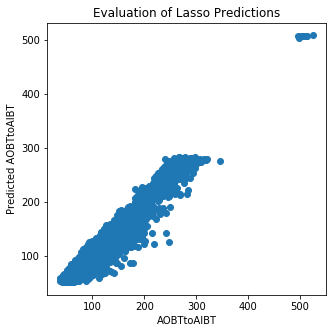

In [131]:
# evaluate our predictions respect to actual durations
plt.figure(figsize=(5,5))
plt.scatter(y_val, pred_val)
plt.xlabel('AOBTtoAIBT')
plt.ylabel('Predicted AOBTtoAIBT')
plt.title('Evaluation of Lasso Predictions')

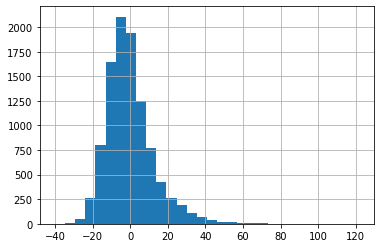

In [132]:
# let's evaluate the distribution of the errors:
# they should be fairly normally distributed
errors = y_val - lasso.predict(X_val)
errors.hist(bins=30)

The distribution of the errors follows a gaussian distribution. That suggests that our model is doing something useful.

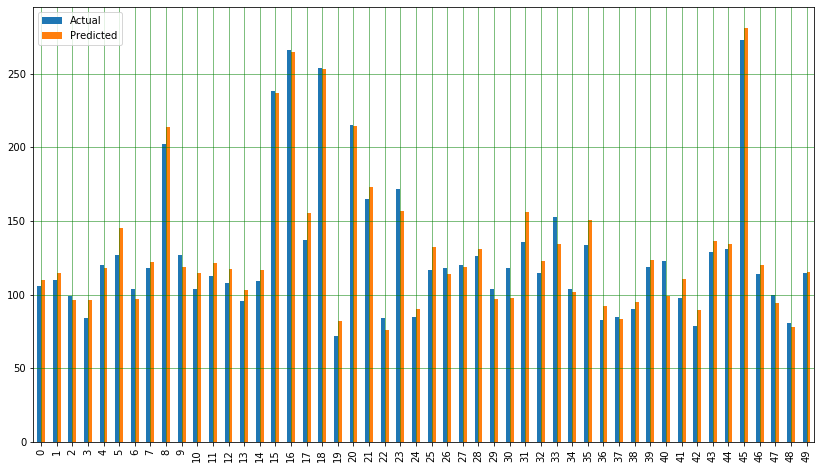

In [133]:
y_val_series = y_val.reset_index(drop=True)
# sch_val_series = sch_val.reset_index(drop=True)
pred_val_series = pd.Series(pred_val)
durations = pd.concat([y_val_series, pred_val_series], axis=1)
# durations = pd.concat([durations, sch_val_series], axis=1)

# durations = durations.rename(columns={'AOBTtoAIBT': 'Actual', 0: 'Predicted', 'SOBTtoSIBT': 'Scheduled'})
durations = durations.rename(columns={'AOBTtoAIBT': 'Actual', 0: 'Predicted'})

first_50 = durations.head(50)
first_50.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Feature Importance

Text(0.5, 1.0, 'Feature Importance')

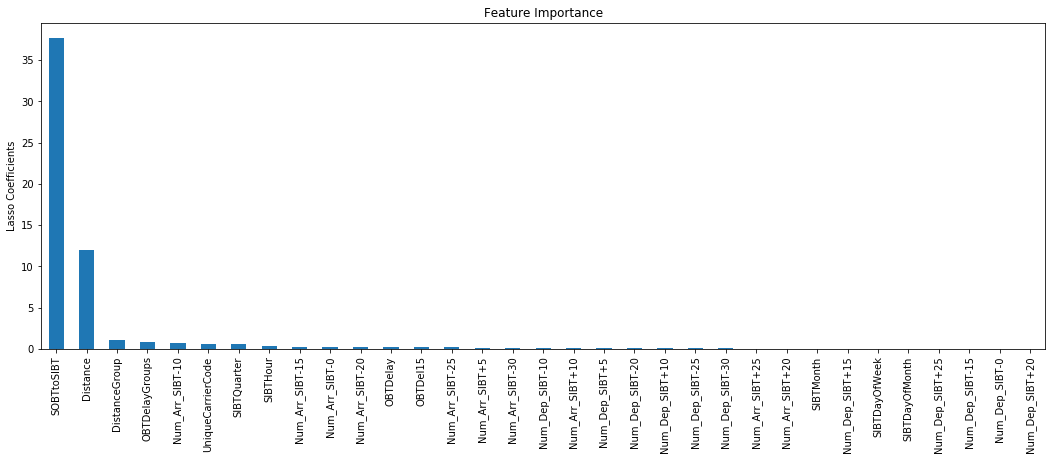

In [154]:
# Finally, look at the feature importance
importance = pd.Series(np.abs(lasso.coef_.ravel()))
importance.index = feats
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18, 6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

## Ridge Regression

### Evaluation of Ridge

In [152]:
# set up the model
ridge = Ridge(alpha=0.005, random_state=RANDOM_SEED)

# train the model
ridge.fit(X_train, y_train)

Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=42, solver='auto', tol=0.001)

In [157]:
# evaluate performance using the RMSE, MAE and R2

# make predictions for train set
pred_train = ridge.predict(X_train)

# determine metrics
print('train rmse: {:.3f}'.format(sqrt(mean_squared_error(y_train, pred_train))))
print('train mae: {:.3f}'.format(mean_absolute_error(y_train, pred_train)))
print('train r2: {:.3f}'.format(r2_score(y_train, pred_train)))
print('train explained variance score: {:.3f}'.format(
    explained_variance_score(y_train, pred_train)))
print('val max error: {:.3f}'.format(max_error(y_train, pred_train)))
print()

# make predictions for validation set
pred_val = ridge.predict(X_val)

# determine metrics
print('val rmse: {:.3f}'.format(sqrt(mean_squared_error(y_val, pred_val))))
print('val mae: {:.3f}'.format(mean_absolute_error(y_val, pred_val)))
print('val r2: {:.3f}'.format(r2_score(y_val, pred_val)))
print('val explained variance score: {:.3f}'.format(
    explained_variance_score(y_val, pred_val)))
print('val max error: {:.3f}'.format(max_error(y_val, pred_val)))
print()

sch_val = flights['SOBTtoSIBT'][-10000:]
# determine metrics
print('sch rmse: {:.3f}'.format(sqrt(mean_squared_error(y_val, sch_val))))
print('sch mae: {:.3f}'.format(mean_absolute_error(y_val, sch_val)))
print('sch r2: {:.3f}'.format(r2_score(y_val, sch_val)))
print('sch explained variance score: {:.3f}'.format(
    explained_variance_score(y_val, sch_val)))
print('val max error: {:.3f}'.format(max_error(y_val, sch_val)))

train rmse: 12.864
train mae: 8.676
train r2: 0.939
train explained variance score: 0.939
val max error: 419.224

val rmse: 12.795
val mae: 9.446
val r2: 0.941
val explained variance score: 0.941
val max error: 121.835

sch rmse: 14.623
sch mae: 11.702
sch r2: 0.923
sch explained variance score: 0.936
val max error: 123.000


### Feature Importance

Text(0.5, 1.0, 'Feature Importance')

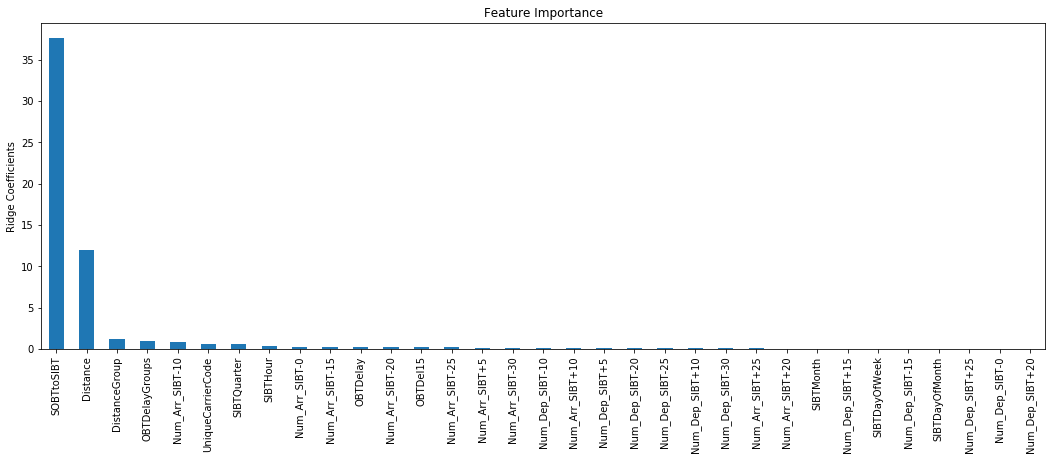

In [156]:
# Finally, look at the feature importance
importance = pd.Series(np.abs(ridge.coef_.ravel()))
importance.index = feats
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18, 6))
plt.ylabel('Ridge Coefficients')
plt.title('Feature Importance')